
Problem 1 (5% credit).
Consider a multivariate regression of the output variable y over the 3 regressors regressors x_1, x_2, x_3, with the observations from the file stored under the following link: https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/homework3/H31.csv (also see below) Which one of the regressors is a dummy variable corresponding to an intercept term?

In [1]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import statsmodels.formula.api as smf
import urllib
#url = "/Users/bhagwatsinghbisht/Downloads/L3.csv"
url = "/Users/bhagwatsinghbisht/Downloads/H31.csv"
f=urllib.urlopen(url)
data= pd.read_csv(f,index_col=0)
data.head()

Populating the interactive namespace from numpy and matplotlib


,y,x1,x2,x3
1,0,1,-2,1
2,2,1,-1,-1
3,2,1,0,0
4,3,1,1,-1
5,3,1,2,1


In [120]:
X=np.matrix(pd.DataFrame({'intercept':[1]*len(data.x1),'x1':data.x1,'x2':data.x2,'x3':data.x3}))
Y=np.matrix(data.y).transpose()
#w=pow((X.transpose()*X),-1)*X.transpose()*Y
#print(w)



In [2]:
lm = smf.ols(formula='y ~ x1+x2+x3', data = data).fit()
lm.summary()

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     59.00
Date:                Sun, 04 Oct 2015   Prob (F-statistic):             0.0167
Time:                        19:43:03   Log-Likelihood:                 2.6854
No. Observations:                   5   AIC:                            0.6293
Df Residuals:                       2   BIC:                           -0.5424
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0000      0.050     20.000      0.002         0.785     1.215
x1             1.0000      0.050     20.000      0.002         0.785     1.215
x2             0.7000      0.071      9.899      0.010         0.396     1.004
x3            -0.5000      0.112     -4.472      0.047        -0.981    -0.019
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.600
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.352
Skew:                          -0.000   Prob(JB):                        0.839
Kurtosis:                       1.700   Cond. No.                     4.65e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.62e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
lm = smf.ols(formula='y ~ x2+x3', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     59.00
Date:                Sun, 04 Oct 2015   Prob (F-statistic):             0.0167
Time:                        20:01:48   Log-Likelihood:                 2.6854
No. Observations:                   5   AIC:                            0.6293
Df Residuals:                       2   BIC:                           -0.5424
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.0000      0.100     20.000      0.002         1.570     2.430
x2             0.7000      0.071      9.899      0.010         0.396     1.004
x3            -0.5000      0.112     -4.472      0.047        -0.981    -0.019
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.600
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.352
Skew:                          -0.000   Prob(JB):                        0.839
Kurtosis:                       1.700   Cond. No.                         1.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As is evident from above analysis , of the given regressors X1 is a dummy variable inspite of having a low p value as removing it is not at all changing the R square value . 

Problem 2 (15% credit).
For the data from the problem 1 perform a manual estimate for the least-square multivariate regression coefficients (not using regression tools, but using appropriate matrix operations and formula (3) from the session notebook).

# having written about this to Varun , for the sake of submission , I am taking H32.csv for this analysis , since i was getting the singular matrix error.

In [18]:
url = "/Users/bhagwatsinghbisht/Downloads/H32.csv"
f=urllib.urlopen(url)
data= pd.read_csv(f,index_col=0)
data.head()

,y,x1,x2,x3,x4,x5
1,-0.051423,21.456917,-7.042114,1.073317,3.901826,0.584972
2,40.420287,90.051574,1.753339,15.469912,-2.395206,0.781003
3,45.355541,77.469130,-10.883196,18.067204,3.721862,0.980952
4,30.419936,51.284138,23.361324,10.390302,-0.723471,0.850541
5,22.028759,45.963734,11.372415,10.177206,-0.739538,0.137674


In [26]:
X=np.matrix(pd.DataFrame({'intercept':[1]*len(data.x1),'x1':data.x1,'x2':data.x2,'x3':data.x3,'x4':data.x4,'x5':data.x5}))
Y=np.matrix(data.y).transpose()
w=pow((X.transpose()*X),-1)*X.transpose()*Y   
c=X.transpose()*X
print 'the least squared multisquared variate regression coefficients are :'
print 'the value of intercept is', w[0]
print 'the value of coefficient is X1', w[1]
print 'the value of coefficient is X2', w[2]
print 'the value of coefficient is X3', w[3]
print 'the value of coefficient is X4', w[4]
print 'the value of coefficient is X5', w[5]

the least squared multisquared variate regression coefficients are :
the value of intercept is [[-0.22510449]]
the value of coefficient is X1 [[ 0.00080369]]
the value of coefficient is X2 [[-0.02079314]]
the value of coefficient is X3 [[ 2.01030535]]
the value of coefficient is X4 [[-1.00586732]]
the value of coefficient is X5 [[ 10.40067069]]



Problem 3 (15% of credit)
Prove that regressors x1,x2,x3 are mutually ortogonal. Perform an estimate for regression coefficients using uni-variate regressions formulas. Compare with the results of problem 2.

In [39]:
X=np.matrix(data)
cov=(X[:,1:4]).transpose()*(X[:,1:4])/100
print(cov>1e-10)


[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


Problem 4 (5% credit) Suppose that a multiple regression with 7 regressors gave the following p-values for each of them: 0.01, 1e-15, 0.1, 0.04, 0.001, 0.06, 0.03 How many regressors you would exclude based on that? Please explain.

# Solution : To decrease the noise , generally the regressor having the high p value>0.05 are removed , so the regressor having p value .06 can be excluded.

In [27]:
validation=data[70:99]
data=data[0:69]


In [28]:
X=np.matrix(pd.DataFrame({'intercept':[1]*len(data.x1),'x1':data.x1,'x2':data.x2,'x3':data.x3,'x4':data.x4,'x5':data.x5}))
Y=np.matrix(data.y).transpose()
w=pow((X.transpose()*X),-1)*X.transpose()*Y
print(w)

[[ -7.03252793e-01]
 [ -6.12844576e-03]
 [ -2.53338192e-02]
 [  2.03376041e+00]
 [ -1.10722220e+00]
 [  1.09161468e+01]]


Problem 6 (20% credit) Perform a multivariate regression of y over x1,x2,x3,x4,x5 (with an intercept) using the observations from: : https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/homework3/H32.csv

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     367.0
Date:                Sun, 04 Oct 2015   Prob (F-statistic):           3.47e-45
Time:                        20:27:38   Log-Likelihood:                -155.87
No. Observations:                  69   AIC:                             323.7
Df Residuals:                      63   BIC:                             337.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.7033      0.802     -0.877      0.384        -2.305     0.899
x1            -0.0061      0.011     -0.567      0.573        -0.028     0.015
x2            -0.0253      0.021     -1.181      0.242        -0.068     0.018
x3             2.0338      0.056     36.250      0.000         1.922     2.146
x4            -1.1072      0.116     -9.510      0.000        -1.340    -0.875
x5            10.9161      1.056     10.334      0.000         8.805    13.027
==============================================================================
Omnibus:                       14.477   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.914
Skew:                           0.958   Prob(JB):                     0.000212
Kurtosis:                       4.488   Cond. No.                         232.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

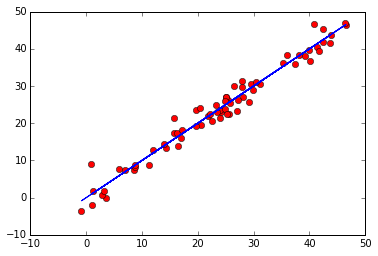

In [31]:
lmy = lm.predict(data)
plt.plot(lmy,data.y,'or')
plt.plot(lmy,lmy,'-b')
lm = smf.ols(formula='y ~ x1+x2+x3+x4+x5', data = data).fit()

lm.summary()



Problem 7 (20% credit) Perform the same regression as from the problem 5 but after standardization of the regressors. Report the regressor having the highest impact on the responce variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     581.7
Date:                Sun, 04 Oct 2015   Prob (F-statistic):           4.76e-69
Time:                        20:28:16   Log-Likelihood:                -220.81
No. Observations:                 100   AIC:                             453.6
Df Residuals:                      94   BIC:                             469.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     23.8651      0.227    105.095      0.000        23.414    24.316
x1             0.0231      0.236      0.098      0.922        -0.445     0.491
x2            -0.3145      0.237     -1.329      0.187        -0.784     0.155
x3            11.0882      0.240     46.266      0.000        10.612    11.564
x4            -2.7646      0.238    -11.600      0.000        -3.238    -2.291
x5             3.0308      0.232     13.070      0.000         2.570     3.491
==============================================================================
Omnibus:                        7.114   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.748
Skew:                           0.521   Prob(JB):                       0.0342
Kurtosis:                       3.732   Cond. No.                         1.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

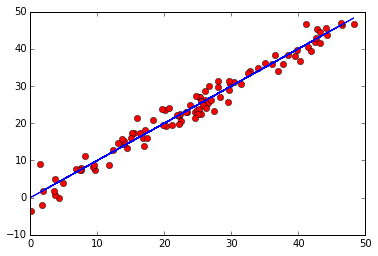

In [32]:
####standardising the values 

url='/Users/bhagwatsinghbisht/Downloads/H32.csv'
f = urllib.urlopen(url)
data = pd.read_csv(f , index_col=0 )
data.x1=(data.x1-mean(data.x1))/std(data.x1)
data.x2=(data.x2-mean(data.x2))/std(data.x2)
data.x3=(data.x3-mean(data.x3))/std(data.x3)
data.x4=(data.x4-mean(data.x4))/std(data.x4)
data.x5=(data.x5-mean(data.x5))/std(data.x5)
lm = smf.ols(formula='y ~ x1 + x2 + x3 + x4 + x5 ', data = data).fit()
lmy = lm.predict(data)
plt.plot(lmy,data.y,'or')
plt.plot(lmy,lmy,'-b') 
lm.summary()

# Observation : After removing the variable X3 , the R square value drops to 22.4% which means the model is only 23% correct. Hence X3 is regressor having the highest impact on the response variable


Problem 8 (20% credit) Analyzing regression statistics from problem 6 exclude the regressors with insignificant impact. Repeat the regression over the remaining regressors only and report the statistics.

Solution:

In [33]:
url = '/Users/bhagwatsinghbisht/Downloads/H32.csv'
f = urllib.urlopen(url)
data = pd.read_csv(f,index_col=0)
###getting regression result for all the regressors  .
lm = smf.ols(formula='y ~ x1+x2+x4+x3+x5', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     581.7
Date:                Sun, 04 Oct 2015   Prob (F-statistic):           4.76e-69
Time:                        20:29:42   Log-Likelihood:                -220.81
No. Observations:                 100   AIC:                             453.6
Df Residuals:                      94   BIC:                             469.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2251      0.648     -0.347      0.729        -1.513     1.062
x1             0.0008      0.008      0.098      0.922        -0.015     0.017
x2            -0.0208      0.016     -1.329      0.187        -0.052     0.010
x4            -1.0059      0.087    -11.600      0.000        -1.178    -0.834
x3             2.0103      0.043     46.266      0.000         1.924     2.097
x5            10.4007      0.796     13.070      0.000         8.821    11.981
==============================================================================
Omnibus:                        7.114   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.748
Skew:                           0.521   Prob(JB):                       0.0342
Kurtosis:                       3.732   Cond. No.                         239.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# from the above observation it is clear that the regressor X1 and X2 with p value .922 and .187 are eligible for exclusion , also the confidence interval is a bit different .


# after exclusion of the values with higher p value

# we notice that the R square value has not changed much, hence the regressor X1 and X2 were not significant and were correct to removed for better analysis . The R square value stil is 96.8 , this may be due to corelation etc, removing any other value is significantly impacting the R square value .

it is shown as below : 

In [34]:
lm = smf.ols(formula='y ~ x4+x3+x5', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     970.7
Date:                Sun, 04 Oct 2015   Prob (F-statistic):           1.20e-71
Time:                        20:32:26   Log-Likelihood:                -221.77
No. Observations:                 100   AIC:                             451.5
Df Residuals:                      96   BIC:                             462.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1232      0.559     -0.220      0.826        -1.233     0.987
x4            -0.9873      0.084    -11.698      0.000        -1.155    -0.820
x3             2.0008      0.042     47.924      0.000         1.918     2.084
x5            10.4450      0.794     13.162      0.000         8.870    12.020
==============================================================================
Omnibus:                        7.149   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.872
Skew:                           0.510   Prob(JB):                       0.0322
Kurtosis:                       3.780   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The value of R square is not impacted in anyway after removing x1 and x2 so they are not significant.